# `apply_chords_3D`
Adds chords to the void space in all three principle directions.  The chords are seprated by 1 voxel plus the provided spacing.  Chords in the X, Y and Z directions are labelled 1, 2 and 3 resepctively.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

In [2]:
import inspect
print(inspect.signature(ps.filters.apply_chords_3D))

(im, spacing=0, trim_edges=True)


## `im`
The function takes a boolean image with ``True`` values indicating the void space, or phase of interest. 

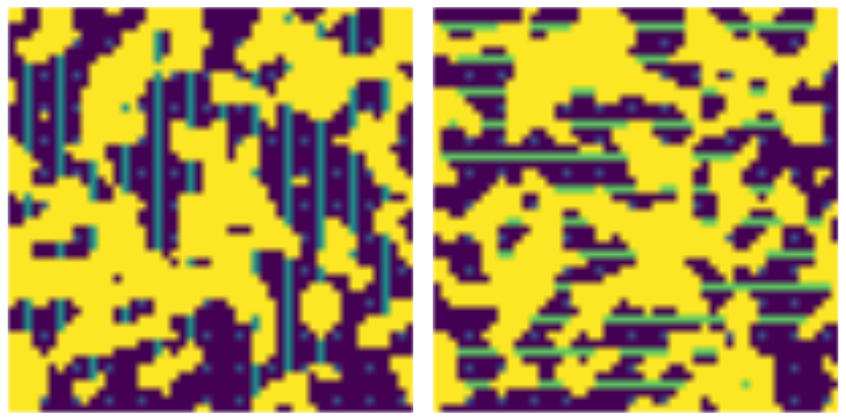

In [3]:
im = ps.generators.blobs(shape=[50, 50, 50])
chords = ps.filters.apply_chords_3D(im)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(chords[20, ...] + ~im[20, ...]*4)
ax[0].axis(False)
ax[1].imshow(chords[22, ...] + ~im[22, ...]*4)
ax[1].axis(False);

The chords in each direction are given different integer values so they can isolated by thresholding.

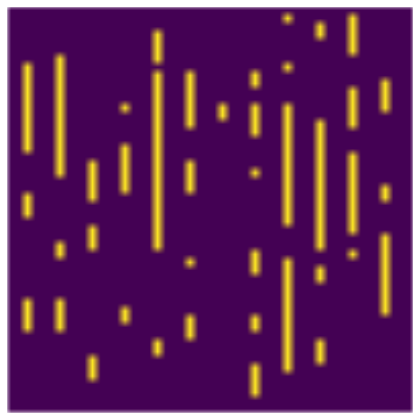

In [4]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(chords[20, ...] ==2)
ax.axis(False);

## `spacing`
By default the chords are drown with a spacing of 1 voxel between each orientation to provide the maximum number of chords. This can be adjusted to create few chords if the image is very large if needed.

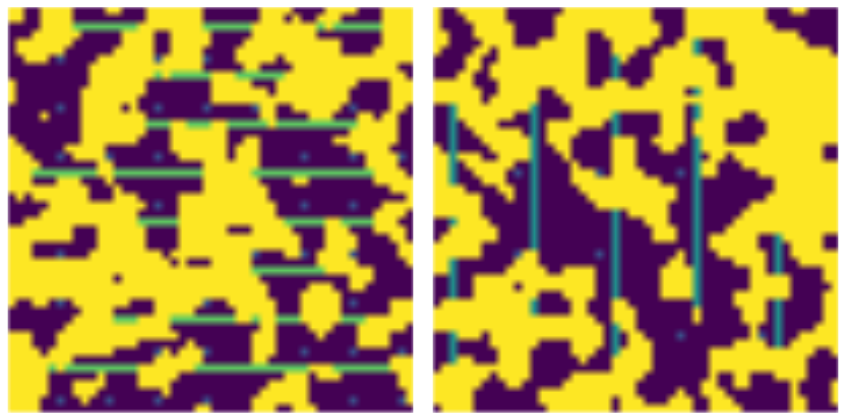

In [5]:
c1 = ps.filters.apply_chords_3D(im, spacing=1)
c3 = ps.filters.apply_chords_3D(im, spacing=3)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(c1[20, ...] + ~im[20, ...]*4)
ax[0].axis(False)
ax[1].imshow(c3[30, ...] + ~im[30, ...]*4)
ax[1].axis(False);

## `trim_edges`

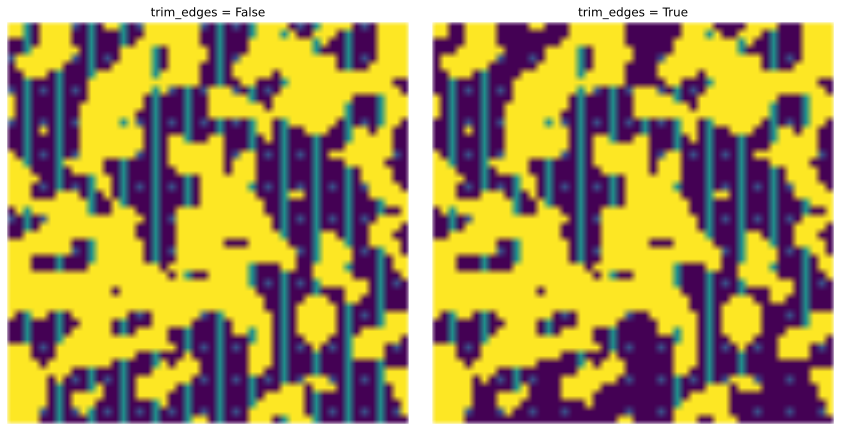

In [6]:
c1 = ps.filters.apply_chords_3D(im, trim_edges=False)
c2 = ps.filters.apply_chords_3D(im, trim_edges=True)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(c1[20, ...] + ~im[20, ...]*4)
ax[0].axis(False)
ax[0].set_title('trim_edges = False')
ax[1].imshow(c2[20, ...] + ~im[20, ...]*4)
ax[1].axis(False)
ax[1].set_title('trim_edges = True');